code adapted from https://pub.towardsai.net/multiclass-image-classification-hands-on-with-keras-and-tensoflow-e1cf434f3467

In [264]:
import numpy as np
import os
from random import choice, randint
from PIL import Image, ImageOps
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
 
from sklearn.metrics import classification_report, confusion_matrix
 
# deep learning libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
 
import cv2
 

import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import os
from numpy.random import seed
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
from tensorflow.random import set_seed
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [265]:
def show_images(image_list):
    for i in image_list:
        plt.imshow(i)
        plt.pause(0.5)

def convertToArray(image_list):
    image_array_list=[]
    for i in image_list:
        image_array_list.append(np.asarray(i))
    return pd.Series(image_array_list)

def convertToImage(image_array_list):
    image_list=[]
    for i in image_array_list:
        image_list.append(Image.fromarray(i))
    return pd.Series(image_list)

In [266]:
reptiles=pd.DataFrame()

In [267]:
reptile_file=os.listdir("/Users/erikafox/desktop/reptiles/")
for i in reptile_file:
    rep_list=[]
    if (i != ".DS_Store"):
        for j in os.listdir("/Users/erikafox/desktop/reptiles/"+i):
            if (j != ".DS_Store"):
                if len(rep_list)<300:
                    rep_list.append(Image.open("/Users/erikafox/desktop/reptiles/"+i+"/"+j).convert("RGBA"))
        
        rep_list=convertToArray(rep_list)
        df=pd.DataFrame({"image":rep_list})

        df["target"]=i
        reptiles=pd.concat([reptiles,df])
        

In [268]:
turtles=reptiles[reptiles["target"]=="Turtle_Tortoise"]
gator=reptiles[reptiles["target"]=="Crocodile_Alligator"]

In [269]:
remove_types=["Chameleon","Lizard","Toad"]
reptiles=reptiles[reptiles["target"].isin(remove_types)==False]

In [270]:
reptiles["target"].value_counts()


Turtle_Tortoise        300
Crocodile_Alligator    300
Iguana                 300
Gecko                  300
Frog                   300
Salamander             300
Snake                  300
Name: target, dtype: int64

In [271]:
reptiles=reptiles.reset_index()

In [272]:
reptiles

,index,image,target
0,0,"[[[5, 6, 0, 255], [3, 4, 0, 255], [7, 8, 2, 25...",Turtle_Tortoise
1,1,"[[[79, 104, 3, 255], [80, 105, 4, 255], [83, 1...",Turtle_Tortoise
2,2,"[[[95, 121, 110, 255], [65, 86, 77, 255], [41,...",Turtle_Tortoise
3,3,"[[[82, 90, 43, 255], [81, 90, 43, 255], [81, 9...",Turtle_Tortoise
4,4,"[[[181, 170, 164, 255], [206, 195, 189, 255], ...",Turtle_Tortoise
...,...,...,...
2095,295,"[[[14, 24, 0, 255], [14, 24, 0, 255], [15, 25,...",Snake
2096,296,"[[[23, 64, 20, 255], [36, 71, 39, 255], [54, 8...",Snake
2097,297,"[[[2, 2, 2, 255], [1, 1, 1, 255], [1, 1, 1, 25...",Snake
2098,298,"[[[124, 118, 92, 255], [125, 119, 93, 255], [1...",Snake


In [273]:
img_list = list(reptiles['image'])
data_img = []
for each in img_list:
               each_img = cv2.cvtColor(each, cv2.COLOR_BGR2RGB)
               #Resize the images:
               each_img_resized = cv2.resize(each_img, (128,128))
               #Save arrays to a list:
               data_img.append(each_img_resized)
# Converting list to numpy array
X = np.array(data_img)

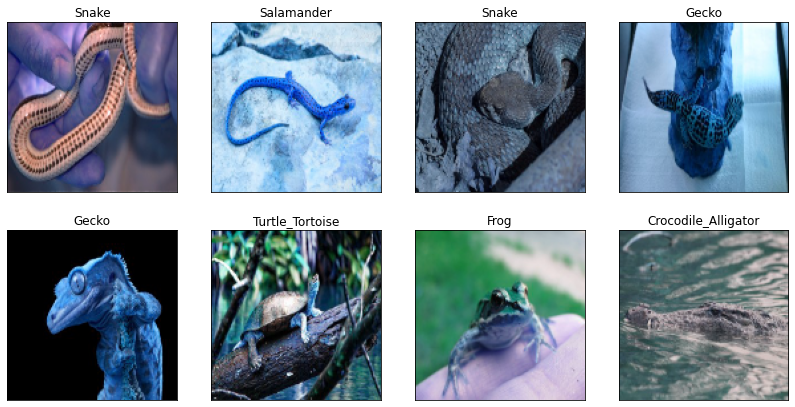

In [274]:
indices = np.random.randint(0,len(reptiles),8)
i = 1
plt.figure(figsize=(14,7))
for each in indices:
    plt.subplot(2,4,i)
    plt.imshow(X[each])
    plt.title(reptiles['target'].loc[each])
    plt.xticks([])
    plt.yticks([])
    i += 1

In [275]:
y = OneHotEncoder(dtype='int8', sparse=False).fit_transform(reptiles['target'].values.reshape(-1,1))

0 - Croc
1 - Frog
2 - Gecko
3 - Iguana
4 - Salamander
5 - Snake
6 - Turtle



In [276]:
y[0]

array([0, 0, 0, 0, 0, 0, 1], dtype=int8)

In [277]:
reptiles["target"][0]

'Turtle_Tortoise'

In [278]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)


In [279]:
y_train

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int8)

In [280]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape  : ', X_val.shape)
print('y_val shape  : ', y_val.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape:  (1428, 128, 128, 3)
y_train shape:  (1428, 7)
X_val shape  :  (357, 128, 128, 3)
y_val shape  :  (357, 7)
X_test shape :  (315, 128, 128, 3)
y_test shape :  (315, 7)


In [281]:
train_gen = ImageDataGenerator(horizontal_flip=True,
                               rotation_range = 45,
                               zoom_range=0.2,
                               height_shift_range = 0.5,
                               width_shift_range = 0.5)
validation_gen = ImageDataGenerator(horizontal_flip=True,
                                    rotation_range = 45,
                                    zoom_range=0.2,
                                    height_shift_range = 0.5,
                                    width_shift_range = 0.5)
train_gen.fit(X_train)
validation_gen.fit(X_val)

In [282]:
batch_size = 64
epochs = 10
base = Xception(include_top=False, 
                weights='imagenet', 
                input_shape=(128,128,3))
x = base.output
x = GlobalAveragePooling2D()(x)
head = Dense(y_test.shape[1], activation='softmax')(x)
model = Model(inputs=base.input, outputs=head)
model.compile(optimizer=Adam(lr=0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'], run_eagerly=True)
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 63, 63, 32)   864         ['input_10[0][0]']               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 63, 63, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                            

/Users/erikafox/opt/miniconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [283]:
mhistory = model.fit_generator(
               train_gen.flow(X_train, y_train,
               batch_size=batch_size),
               epochs = epochs,
               validation_data = validation_gen.flow(X_val, y_val)
)

/var/folders/5b/sjkc4b8n0hs41zd03hxr66100000gn/T/ipykernel_28060/1274160052.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  mhistory = model.fit_generator(


Epoch 1/10
23/23 [==============================] - 121s 5s/step - loss: 1.8736 - accuracy: 0.2339 - val_loss: 2.1782 - val_accuracy: 0.2185
Epoch 2/10
23/23 [==============================] - 118s 5s/step - loss: 1.5564 - accuracy: 0.4643 - val_loss: 1.8225 - val_accuracy: 0.3697
Epoch 3/10
23/23 [==============================] - 121s 5s/step - loss: 1.2761 - accuracy: 0.5749 - val_loss: 1.6857 - val_accuracy: 0.4790
Epoch 4/10
23/23 [==============================] - 121s 5s/step - loss: 1.0977 - accuracy: 0.6345 - val_loss: 1.4612 - val_accuracy: 0.5322
Epoch 5/10
23/23 [==============================] - 127s 6s/step - loss: 0.8992 - accuracy: 0.6933 - val_loss: 1.1918 - val_accuracy: 0.6134
Epoch 6/10
13/23 [===============>..............] - ETA: 51s - loss: 0.8457 - accuracy: 0.7224

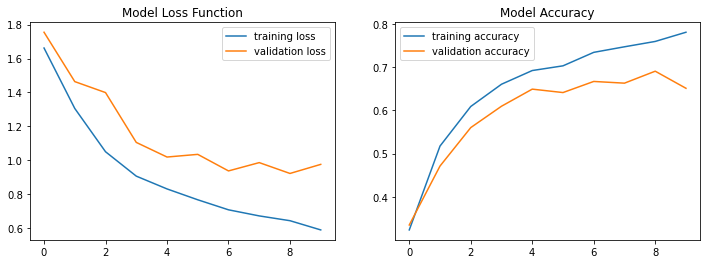

In [ ]:
history_df = pd.DataFrame(mhistory.history)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history_df['loss'], label='training loss')
plt.plot(history_df['val_loss'], label='validation loss')
plt.title('Model Loss Function')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_df['accuracy'], label='training accuracy')
plt.plot(history_df['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.legend();

14/14 [==============================] - 8s 574ms/step


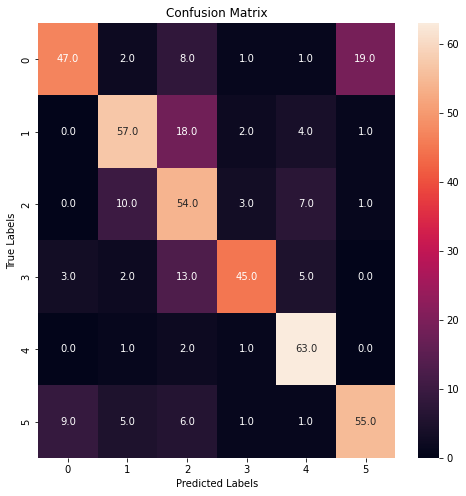

In [ ]:
# Predicting labels from X_test data
y_pred = model.predict(X_test)
# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test labels from one hot encoding to list
y_test_classes = np.argmax(y_test, axis = 1)
# Create the confusion matrix
confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show();

In [ ]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.80      0.60      0.69        78
           1       0.74      0.70      0.72        82
           2       0.53      0.72      0.61        75
           3       0.85      0.66      0.74        68
           4       0.78      0.94      0.85        67
           5       0.72      0.71      0.72        77

    accuracy                           0.72       447
   macro avg       0.74      0.72      0.72       447
weighted avg       0.73      0.72      0.72       447



In [ ]:
X_train

array([[[[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 86, 104, 115],
         [103, 119, 131],
         [109, 126, 137]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 84, 101, 110],
         [102, 119, 128],
         [102, 119, 129]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [ 93, 110, 119],
        

In [ ]:
y_test

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=int8)

In [ ]:
y_test_classes

array([3, 3, 3, 0, 4, 4, 1, 4, 2, 5, 5, 2, 2, 2, 1, 4, 5, 5, 0, 1, 0, 4,
       2, 5, 4, 1, 1, 1, 5, 2, 3, 3, 3, 2, 1, 3, 4, 1, 2, 2, 0, 3, 0, 4,
       2, 0, 1, 2, 2, 3, 2, 2, 0, 5, 4, 1, 1, 0, 0, 1, 3, 5, 1, 4, 2, 3,
       1, 1, 2, 2, 2, 5, 1, 0, 1, 5, 5, 3, 4, 3, 1, 1, 1, 1, 2, 4, 3, 2,
       0, 0, 1, 5, 3, 0, 2, 5, 2, 1, 1, 3, 2, 1, 0, 2, 3, 0, 4, 1, 5, 3,
       5, 2, 2, 4, 5, 5, 2, 2, 0, 2, 0, 1, 4, 5, 5, 0, 0, 4, 4, 4, 3, 0,
       4, 3, 1, 0, 4, 1, 5, 4, 0, 2, 0, 4, 3, 3, 1, 4, 0, 1, 5, 2, 4, 0,
       0, 2, 2, 5, 5, 4, 4, 0, 5, 5, 3, 2, 2, 5, 2, 4, 3, 0, 4, 4, 5, 1,
       1, 1, 2, 0, 5, 2, 0, 5, 2, 3, 5, 1, 0, 0, 4, 4, 2, 0, 3, 4, 4, 0,
       5, 0, 1, 4, 2, 2, 5, 5, 5, 1, 5, 0, 2, 4, 0, 3, 0, 3, 2, 1, 1, 4,
       3, 1, 5, 1, 1, 5, 2, 1, 4, 3, 3, 3, 5, 3, 3, 2, 1, 3, 1, 2, 5, 3,
       4, 1, 5, 5, 1, 1, 5, 0, 5, 3, 3, 3, 3, 5, 0, 1, 5, 1, 0, 0, 5, 0,
       4, 0, 1, 2, 4, 1, 3, 1, 4, 4, 4, 3, 0, 0, 0, 3, 0, 3, 4, 0, 3, 4,
       0, 0, 4, 2, 0, 4, 0, 3, 1, 0, 4, 0, 2, 2, 5,